# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Reading Dataset

In [5]:
file_path = r"C:\Users\shravya\PycharmProjects\minor\DDOS Dataset.csv"
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [7]:
df.shape

(15462150, 26)

In [9]:
print("dataset info:\n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15462150 entries, 0 to 15462149
Data columns (total 26 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   timestamp                 float64
 1   flow_id                   object 
 2   ip_src                    object 
 3   tp_src                    int64  
 4   ip_dst                    object 
 5   tp_dst                    int64  
 6   ip_proto                  int64  
 7   flow_duration_sec         int64  
 8   flow_duration_nsec        float64
 9   idle_timeout              int64  
 10  hard_timeout              int64  
 11  packet_count              int64  
 12  byte_count                float64
 13  packet_count_per_second   float64
 14  packet_count_per_nsecond  float64
 15  byte_count_per_second     float64
 16  byte_count_per_nsecond    float64
 17  FIN_Flag_Cnt              float64
 18  SYN_Flag_Cnt              float64
 19  RST_Flag_Cnt              float64
 20  PSH_Flag_Cnt          

# Displaying the total number of missing values in each attribute

In [12]:
df.isnull().sum()

timestamp                          0
flow_id                            0
ip_src                             0
tp_src                             0
ip_dst                             0
tp_dst                             0
ip_proto                           0
flow_duration_sec                  0
flow_duration_nsec                 0
idle_timeout                       0
hard_timeout                       0
packet_count                       0
byte_count                         0
packet_count_per_second            0
packet_count_per_nsecond           0
byte_count_per_second          29713
byte_count_per_nsecond         29713
FIN_Flag_Cnt                12794627
SYN_Flag_Cnt                12794627
RST_Flag_Cnt                12794627
PSH_Flag_Cnt                12794627
ACK_Flag_Cnt                12794627
URG_Flag_Cnt                12794627
CWE_Flag_Cnt                12794627
ECE_Flag_Cnt                12794627
label                              0
dtype: int64

In [14]:
df.head(10)

,timestamp,flow_id,ip_src,tp_src,ip_dst,tp_dst,ip_proto,flow_duration_sec,flow_duration_nsec,idle_timeout,...,byte_count_per_nsecond,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Cnt,ECE_Flag_Cnt,label
0,1.589933e+09,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,4,480000000.0,20,...,6.981700e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.589933e+09,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,4,486000000.0,20,...,2.435180e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.589933e+09,10.0.0.35424610.0.0.550501,10.0.0.3,54246,10.0.0.5,5050,1,4,484000000.0,20,...,6.074380e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.589933e+09,10.0.0.55424610.0.0.350501,10.0.0.5,54246,10.0.0.3,5050,1,4,415000000.0,20,...,7.084337e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.589933e+09,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,4,423000000.0,20,...,6.950355e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.589933e+09,10.0.0.5010.0.0.301,10.0.0.5,0,10.0.0.3,0,1,4,417000000.0,20,...,7.050360e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.589933e+09,10.0.0.3010.0.0.501,10.0.0.3,0,10.0.0.5,0,1,14,429000000.0,20,...,2.969697e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,1.589933e+09,10.0.0.5010.0.0.301,10.0.0.5,0,10.0.0.3,0,1,14,423000000.0,20,...,3.011820e-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,1.589933e+09,10.0.0.1505010.0.0.3542466,10.0.0.1,5050,10.0.0.3,54246,6,14,486000000.0,20,...,1.893820e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,1.589933e+09,10.0.0.35424610.0.0.150506,10.0.0.3,54246,10.0.0.1,5050,6,14,492000000.0,20,...,6.893538e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Drop non-numeric columns

In [17]:
df = df.drop(columns=['flow_id','ip_src','ip_dst','timestamp'], errors='ignore')
print("columns dropped successfully")

columns dropped successfully


In [19]:
df.isnull().sum()

tp_src                             0
tp_dst                             0
ip_proto                           0
flow_duration_sec                  0
flow_duration_nsec                 0
idle_timeout                       0
hard_timeout                       0
packet_count                       0
byte_count                         0
packet_count_per_second            0
packet_count_per_nsecond           0
byte_count_per_second          29713
byte_count_per_nsecond         29713
FIN_Flag_Cnt                12794627
SYN_Flag_Cnt                12794627
RST_Flag_Cnt                12794627
PSH_Flag_Cnt                12794627
ACK_Flag_Cnt                12794627
URG_Flag_Cnt                12794627
CWE_Flag_Cnt                12794627
ECE_Flag_Cnt                12794627
label                              0
dtype: int64

In [21]:
df.shape

(15462150, 22)

# Replace infinity values with NaN and drop NaN rows

In [24]:
df.replace([np.inf,-np.inf],np.nan,inplace=True)
df.dropna(inplace=True)

In [26]:
df.shape

(2667523, 22)

In [28]:
df.isnull().sum()

tp_src                      0
tp_dst                      0
ip_proto                    0
flow_duration_sec           0
flow_duration_nsec          0
idle_timeout                0
hard_timeout                0
packet_count                0
byte_count                  0
packet_count_per_second     0
packet_count_per_nsecond    0
byte_count_per_second       0
byte_count_per_nsecond      0
FIN_Flag_Cnt                0
SYN_Flag_Cnt                0
RST_Flag_Cnt                0
PSH_Flag_Cnt                0
ACK_Flag_Cnt                0
URG_Flag_Cnt                0
CWE_Flag_Cnt                0
ECE_Flag_Cnt                0
label                       0
dtype: int64

# Randomize dataset shuffles the dataset to remove order bias

In [31]:
df=shuffle(df,random_state=42)  
print("Dataset randomized")

Dataset randomized


In [33]:
df.head(10)

,tp_src,tp_dst,ip_proto,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,packet_count,byte_count,packet_count_per_second,...,byte_count_per_nsecond,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Cnt,ECE_Flag_Cnt,label
2157704,31948,80,6,5,444000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2665486,80,53034,6,16,201000000.0,20,100,4,584.0,0.25,...,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
631326,51523,0,17,12,956000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1937885,0,0,1,4,504000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
467037,12331,0,17,13,77000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1519383,6628,80,6,11,272000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2156583,5500,80,6,10,838000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1999545,0,0,1,15,730000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
556431,45600,0,17,2,123000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
961335,0,0,1,13,618000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [35]:
df.tail(10)

,tp_src,tp_dst,ip_proto,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,packet_count,byte_count,packet_count_per_second,...,byte_count_per_nsecond,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Cnt,ECE_Flag_Cnt,label
1136074,22606,0,17,10,121000000.0,20,100,0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2003274,0,0,1,15,233000000.0,20,100,0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1570006,47862,80,6,9,886000000.0,20,100,0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2234489,32168,80,6,8,198000000.0,20,100,0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
732180,5050,51938,6,15,388000000.0,20,100,120277,7938462.0,8018.466667,...,2.045995e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
110268,5050,49024,6,8,857000000.0,20,100,115932,7651968.0,14491.500000,...,8.928784e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1692743,0,0,1,46,372000000.0,20,100,45,4410.0,0.978261,...,1.185484e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2356330,80,34486,6,15,927000000.0,20,100,4,584.0,0.266667,...,6.299892e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2229084,62333,80,6,11,34000000.0,20,100,0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2219110,23142,80,6,17,905000000.0,20,100,0,0.0,0.000000,...,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Seperating target attribute

In [38]:
X=df.drop(columns=['label']).values
y=df['label'].values

# Scaling Data

In [41]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [43]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

tp_src: 61069 unique values
tp_dst: 14662 unique values
ip_proto: 3 unique values
flow_duration_sec: 101 unique values
flow_duration_nsec: 1000 unique values
idle_timeout: 1 unique values
hard_timeout: 1 unique values
packet_count: 46872 unique values
byte_count: 66495 unique values
packet_count_per_second: 91090 unique values
packet_count_per_nsecond: 290464 unique values
byte_count_per_second: 108285 unique values
byte_count_per_nsecond: 310368 unique values
FIN_Flag_Cnt: 1 unique values
SYN_Flag_Cnt: 1 unique values
RST_Flag_Cnt: 1 unique values
PSH_Flag_Cnt: 1 unique values
ACK_Flag_Cnt: 1 unique values
URG_Flag_Cnt: 1 unique values
CWE_Flag_Cnt: 1 unique values
ECE_Flag_Cnt: 1 unique values
label: 2 unique values


# Split dataset into training and test sets

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y,test_size=0.2,random_state=42)

In [48]:
print(f"Data cleaned & processed Training samples:{X_train.shape[0]},Testing samples:{X_test.shape[0]}")

Data cleaned & processed Training samples:2134018,Testing samples:533505


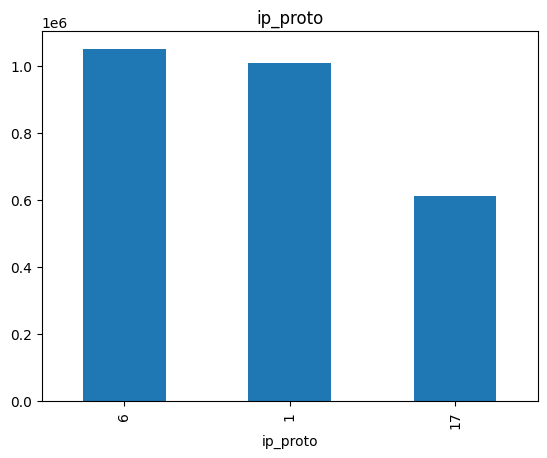

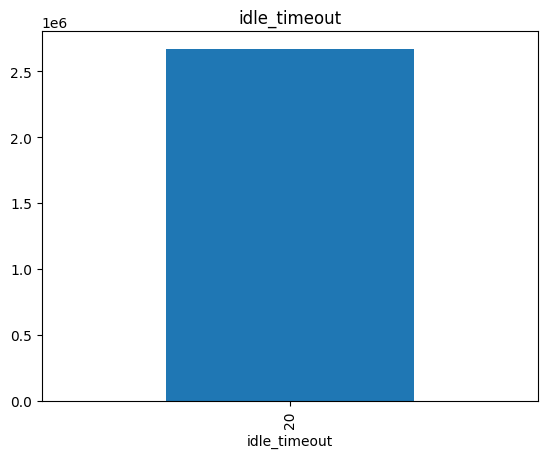

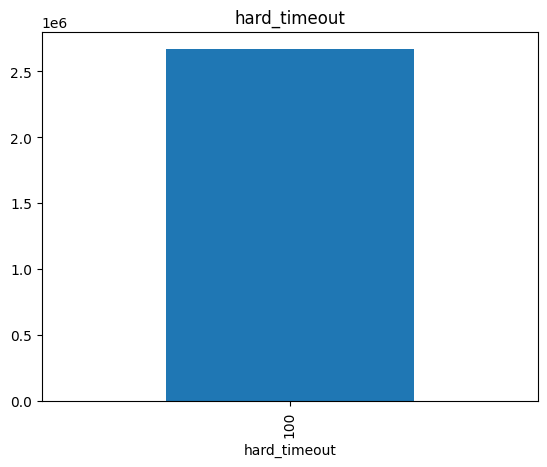

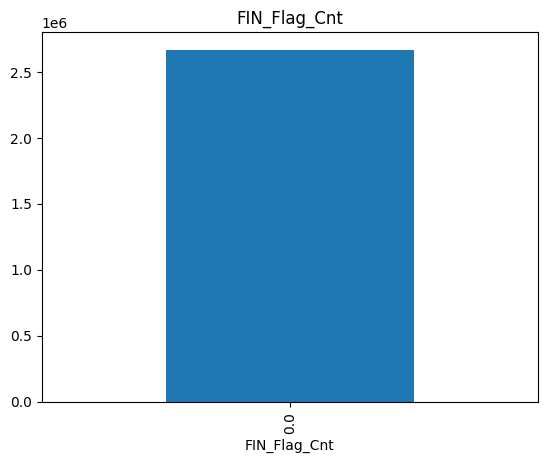

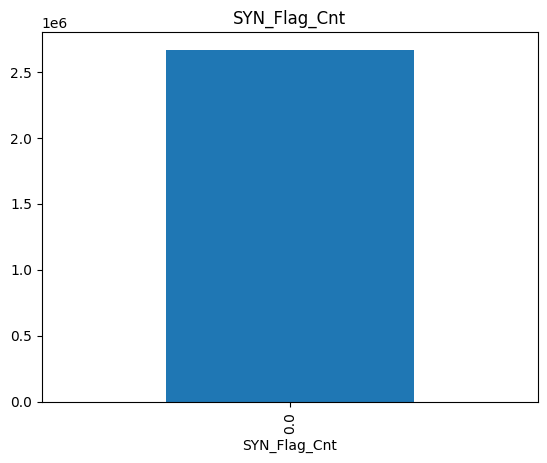

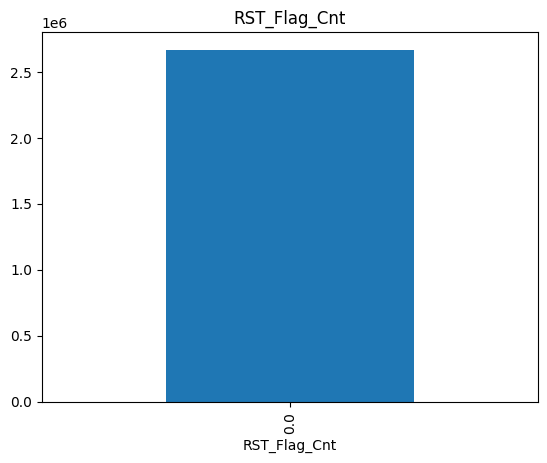

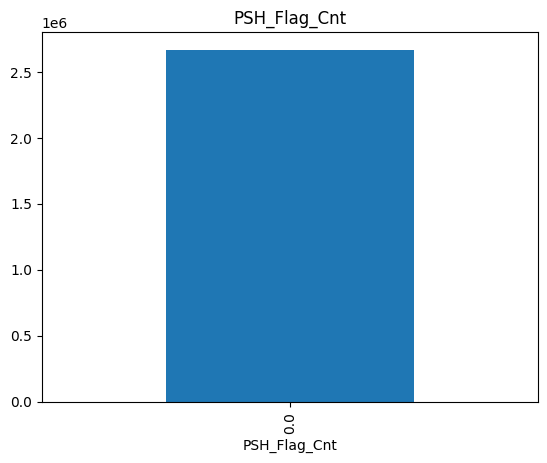

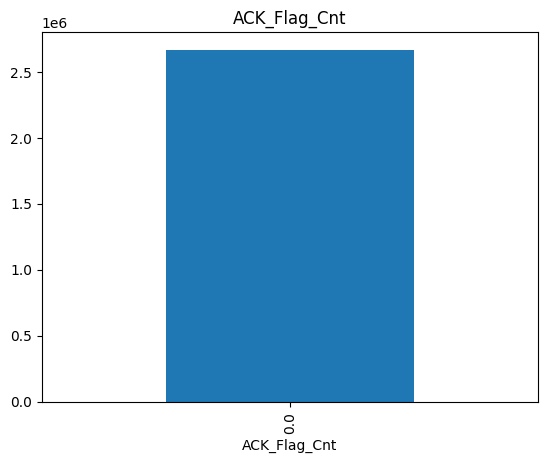

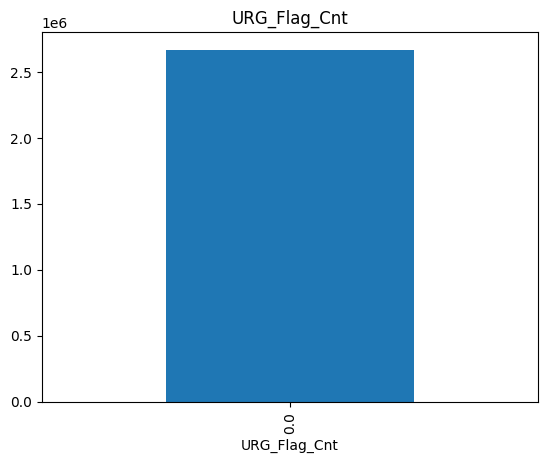

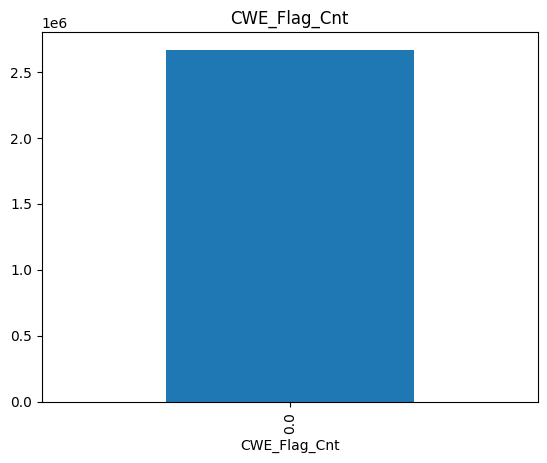

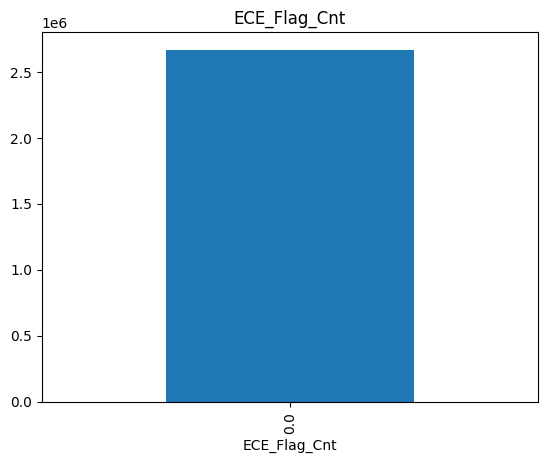

In [50]:
import matplotlib.pyplot as plt
for col in df.columns.drop('label'):
    if df[col].nunique() < 20: 
        df[col].value_counts().plot(kind='bar')
        plt.title(col)
        plt.show()

label                       1.000000
ip_proto                    0.164321
flow_duration_nsec         -0.005353
byte_count_per_nsecond     -0.041564
tp_src                     -0.044696
packet_count_per_nsecond   -0.049759
byte_count_per_second      -0.219515
byte_count                 -0.223873
packet_count_per_second    -0.264820
packet_count               -0.267989
flow_duration_sec          -0.499979
tp_dst                     -0.552075
idle_timeout                     NaN
hard_timeout                     NaN
FIN_Flag_Cnt                     NaN
SYN_Flag_Cnt                     NaN
RST_Flag_Cnt                     NaN
PSH_Flag_Cnt                     NaN
ACK_Flag_Cnt                     NaN
URG_Flag_Cnt                     NaN
CWE_Flag_Cnt                     NaN
ECE_Flag_Cnt                     NaN
Name: label, dtype: float64


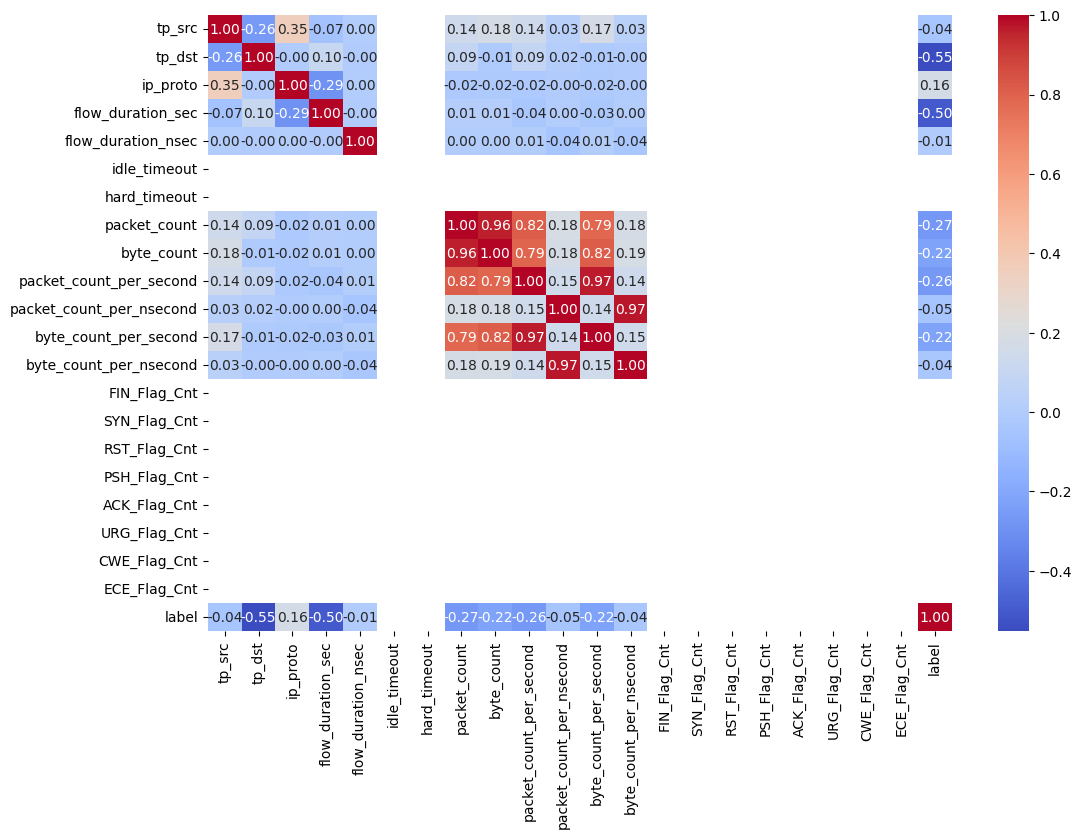

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation matrix
corr = df.corr()
# Correlation with target
print(corr['label'].sort_values(ascending=False))
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


Correlation with 'label':
 label                       1.000000
ip_proto                    0.164321
flow_duration_nsec         -0.005353
byte_count_per_nsecond     -0.041564
tp_src                     -0.044696
packet_count_per_nsecond   -0.049759
byte_count_per_second      -0.219515
byte_count                 -0.223873
packet_count_per_second    -0.264820
packet_count               -0.267989
timestamp                  -0.375314
flow_duration_sec          -0.499979
tp_dst                     -0.552075
idle_timeout                     NaN
hard_timeout                     NaN
FIN_Flag_Cnt                     NaN
SYN_Flag_Cnt                     NaN
RST_Flag_Cnt                     NaN
PSH_Flag_Cnt                     NaN
ACK_Flag_Cnt                     NaN
URG_Flag_Cnt                     NaN
CWE_Flag_Cnt                     NaN
ECE_Flag_Cnt                     NaN
Name: label, dtype: float64
Dropped features: ['flow_duration_nsec', 'byte_count_per_nsecond', 'tp_src', 'packet_count_per

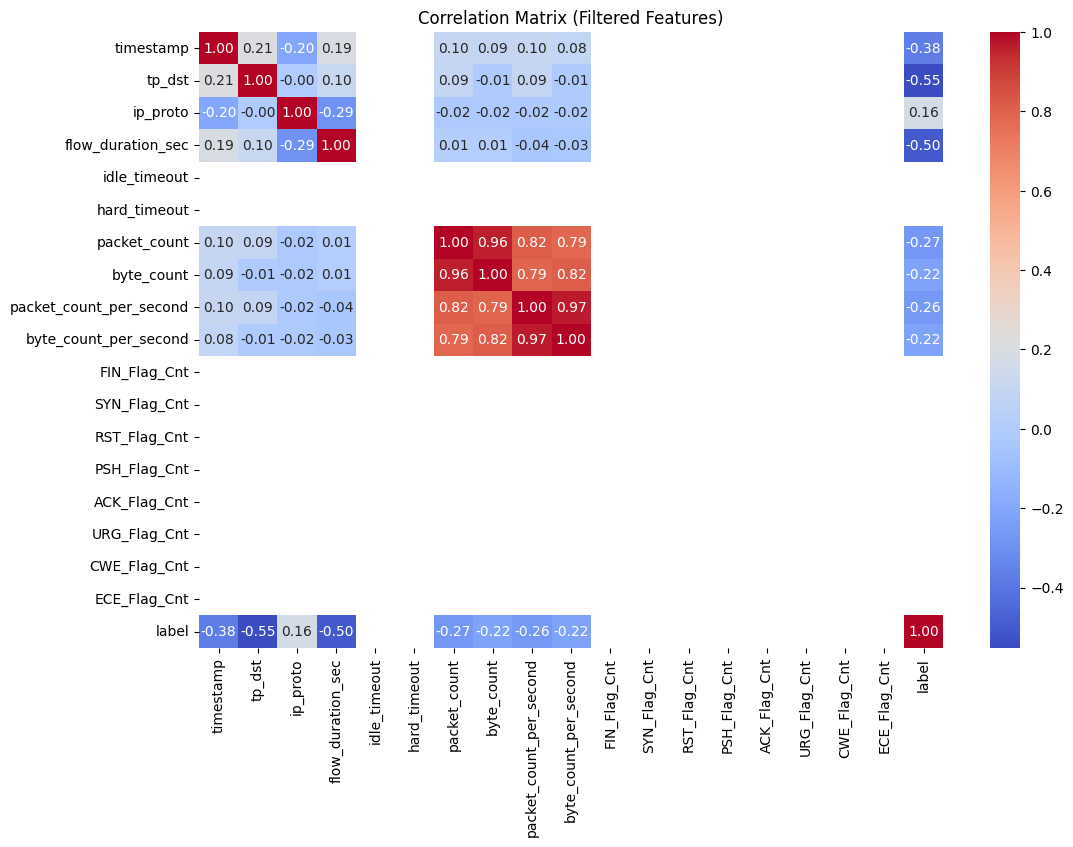

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = df.corr()

# Correlation with target variable ('label')
correlation_with_label = corr['label'].sort_values(ascending=False)
print("Correlation with 'label':\n", correlation_with_label)

# Drop features with correlation < 0.1 (absolute value)
low_corr_features = correlation_with_label[abs(correlation_with_label) < 0.1].index
df = df.drop(columns=low_corr_features)

print(f"Dropped features: {list(low_corr_features)}")
print(f"Remaining features: {list(df.columns)}")

# Plot heatmap for remaining features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix (Filtered Features)")
plt.show()

In [54]:
df.shape

(2667523, 22)

In [56]:
df.head()

,tp_src,tp_dst,ip_proto,flow_duration_sec,flow_duration_nsec,idle_timeout,hard_timeout,packet_count,byte_count,packet_count_per_second,...,byte_count_per_nsecond,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Cnt,ECE_Flag_Cnt,label
2157704,31948,80,6,5,444000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2665486,80,53034,6,16,201000000.0,20,100,4,584.0,0.25,...,0.000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
631326,51523,0,17,12,956000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1937885,0,0,1,4,504000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
467037,12331,0,17,13,77000000.0,20,100,0,0.0,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# ANN(Artificial Neural Network) 

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the model

In [61]:
from tensorflow.keras.regularizers import l2
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),  # Increased dropout
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

C:\Users\shravya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compiling the model

In [65]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall')]
)

# Printing model summary

In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 13,185 (51.50 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [71]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.9384 - loss: 0.2881 - precision: 0.9174 - recall: 0.9971 - val_accuracy: 0.9515 - val_loss: 0.1860 - val_precision: 0.9316 - val_recall: 0.9999
Epoch 2/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9492 - loss: 0.1936 - precision: 0.9300 - recall: 0.9980 - val_accuracy: 0.9515 - val_loss: 0.1800 - val_precision: 0.9317 - val_recall: 0.9999
Epoch 3/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9497 - loss: 0.1879 - precision: 0.9307 - recall: 0.9981 - val_accuracy: 0.9528 - val_loss: 0.1822 - val_precision: 0.9333 - val_recall: 0.9999
Epoch 4/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9496 - loss: 0.1851 - precision: 0.9308 - recall: 0.9977 - val_accuracy: 0.9517 - val_loss: 0.1726 - val_precision: 0.9319 - val_recall: 0.9999
Epoch 5/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 0.9497 - loss: 0.1823 - precision: 0.9310 - recall: 0.9978 - val_accuracy: 0

# Evaluating model on test datset

In [74]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:1.4f}")
print(f"Test Recall: {recall:.4f}")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9520 - loss: 0.1712 - precision: 0.9322 - recall: 0.9999
Test Loss: 0.1715
Test Accuracy: 0.9520
Test Precision: 0.9323
Test Recall: 0.9999


In [264]:
from sklearn.metrics import accuracy_score

y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_ann)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step
Test Accuracy: 95.20%


# Computing Confusion Matrix

In [271]:
conf_matrix = confusion_matrix(y_test, y_pred_ann)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[155696  25578]
 [    24 352207]]


# Visualizing Confusion Matrix

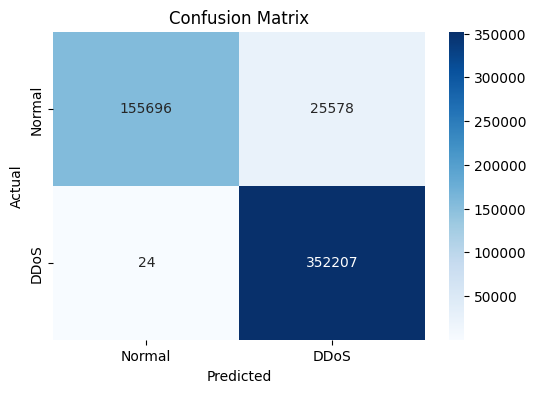

In [274]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [276]:
#  classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    181274
           1       0.93      1.00      0.96    352231

    accuracy                           0.95    533505
   macro avg       0.97      0.93      0.94    533505
weighted avg       0.96      0.95      0.95    533505



Text(0.5, 1.0, 'Accuracy Over Epochs')

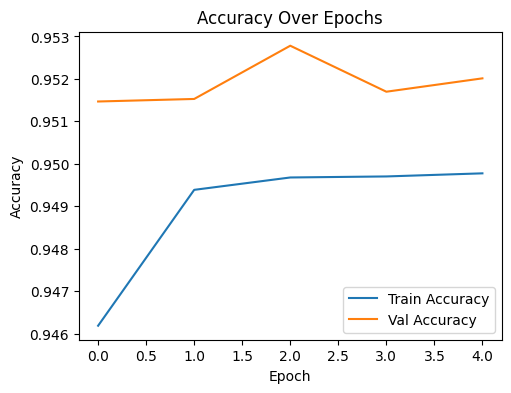

In [278]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

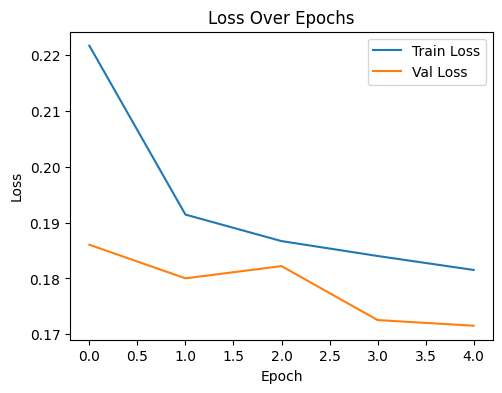

In [280]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

In [282]:
from sklearn.metrics import log_loss

logloss = log_loss(y_test, y_pred_ann)
print(f"Test Log Loss: {logloss:.4f}")

Test Log Loss: 1.7297


# Computing ROC-AUC score and plotting the curve

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 22s 1ms/step
Test ROC-AUC Score: 0.9822


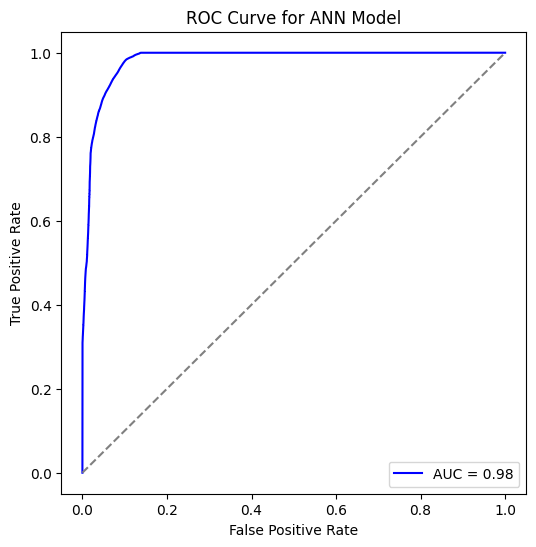

In [288]:
from sklearn.metrics import roc_auc_score, roc_curve
# Generate predictions for ROC-AUC
y_pred_ann = model.predict(X_test).ravel()  # Get probabilities, flatten to 1D

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_ann)
print(f"Test ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_ann)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN Model')
plt.legend(loc="lower right")
plt.show()

# LSTM(Long Short Term Memory)

In [108]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

# Reshaping data for LSTM 

In [111]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


# Creating LSTM model


In [125]:
model_lstm = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.3),  # Added dropout for regularization
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=32, return_sequences=False),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

C:\Users\shravya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compiling the model

In [128]:

model_lstm.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Printing model summary

In [131]:
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 1, 128)         │        76,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,713 (545.75 KB)

 Trainable params: 139,713 (545.75 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [134]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
lstm = model_lstm.fit(
    X_train_lstm, y_train,
    validation_split=0.2,  
    epochs=5,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/5
13338/13338 ━━━━━━━━━━━━━━━━━━━━ 122s 9ms/step - accuracy: 0.9505 - loss: 0.1450 - val_accuracy: 0.9712 - val_loss: 0.0951
Epoch 2/5
13338/13338 ━━━━━━━━━━━━━━━━━━━━ 128s 8ms/step - accuracy: 0.9705 - loss: 0.0968 - val_accuracy: 0.9717 - val_loss: 0.0933
Epoch 3/5
13338/13338 ━━━━━━━━━━━━━━━━━━━━ 118s 9ms/step - accuracy: 0.9707 - loss: 0.0949 - val_accuracy: 0.9717 - val_loss: 0.0922
Epoch 4/5
13338/13338 ━━━━━━━━━━━━━━━━━━━━ 121s 7ms/step - accuracy: 0.9713 - loss: 0.0928 - val_accuracy: 0.9718 - val_loss: 0.0913
Epoch 5/5
13338/13338 ━━━━━━━━━━━━━━━━━━━━ 150s 8ms/step - accuracy: 0.9714 - loss: 0.0924 - val_accuracy: 0.9724 - val_loss: 0.0891


# Evaluating model on test dataset

In [139]:
test_loss, test_accuracy = model_lstm.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9724 - loss: 0.0886
Test Loss: 0.0882
Test Accuracy: 0.9726


In [296]:
from sklearn.metrics import accuracy_score

y_pred_lstm = (model_lstm.predict(X_test_lstm) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step
Test Accuracy: 97.26%


# Computing Confusion Matrix

In [238]:
conf_matrix = confusion_matrix(y_test, y_pred_lstm)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[166704  14570]
 [    38 352193]]


# Visualizing

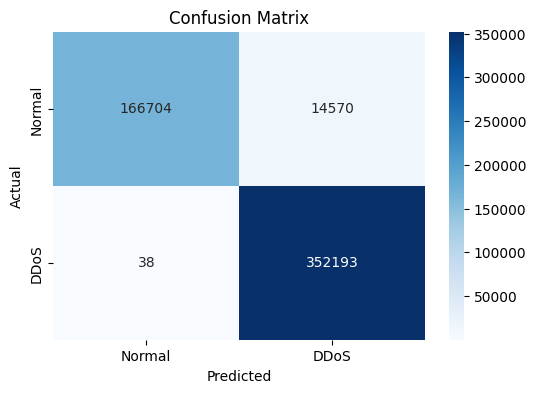

In [241]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Accuracy Over Epochs')

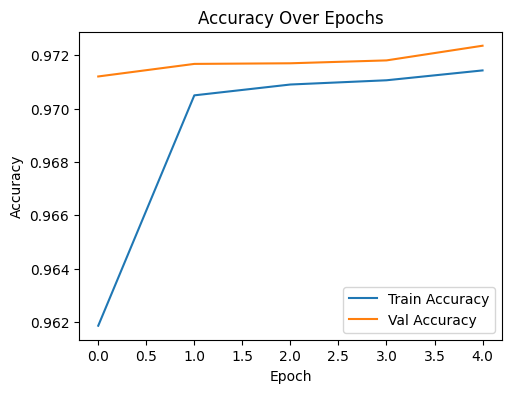

In [243]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm.history['accuracy'], label='Train Accuracy')
plt.plot(lstm.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

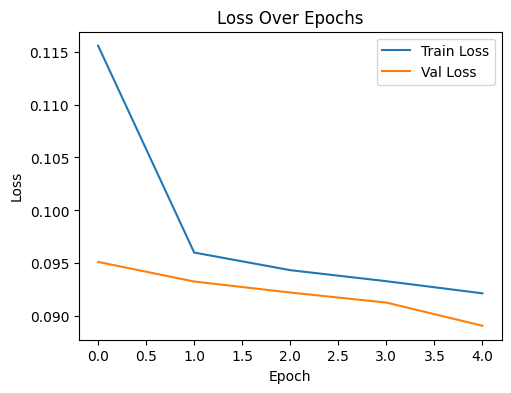

In [245]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(lstm.history['loss'], label='Train Loss')
plt.plot(lstm.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# ROC-AUC curve

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step
Test ROC-AUC Score: 0.9891


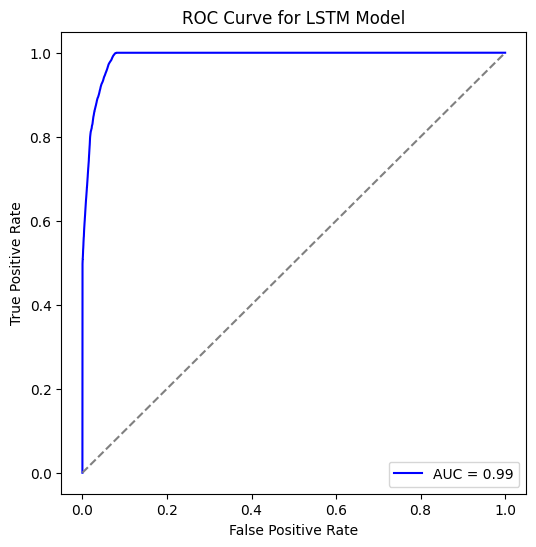

In [250]:
from sklearn.metrics import roc_auc_score, roc_curve
# Generate predictions for ROC-AUC
y_pred_prob = model_lstm.predict(X_test_lstm).ravel()  # Get probabilities, flatten to 1D

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"Test ROC-AUC Score: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LSTM Model')
plt.legend(loc="lower right")
plt.show()

# 1D-CNN(Convolution Neural Network)

In [189]:
from tensorflow.keras.layers import Conv1D, Flatten

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [201]:
model_cnn = Sequential([
    Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    Dropout(0.5),
    Flatten(),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\shravya\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [203]:
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [205]:
cnn=model_cnn.fit(X_train_cnn, y_train, epochs=5, batch_size=128, validation_data=(X_test_cnn, y_test))

Epoch 1/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.9327 - loss: 0.1997 - val_accuracy: 0.9692 - val_loss: 0.1346
Epoch 2/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 75s 5ms/step - accuracy: 0.9600 - loss: 0.1489 - val_accuracy: 0.9716 - val_loss: 0.1340
Epoch 3/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 76s 4ms/step - accuracy: 0.9608 - loss: 0.1373 - val_accuracy: 0.9704 - val_loss: 0.1305
Epoch 4/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 92s 5ms/step - accuracy: 0.9601 - loss: 0.1448 - val_accuracy: 0.9627 - val_loss: 0.1177
Epoch 5/5
16673/16673 ━━━━━━━━━━━━━━━━━━━━ 80s 5ms/step - accuracy: 0.9587 - loss: 0.1340 - val_accuracy: 0.9628 - val_loss: 0.1150


In [209]:
test_loss, test_accuracy = model_cnn.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9626 - loss: 0.1129
Test Loss: 0.1150
Test Accuracy: 0.9628


In [214]:
from sklearn.metrics import accuracy_score

y_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step
Test Accuracy: 96.28%


# Computing Confusion Matrix

In [217]:
conf_matrix = confusion_matrix(y_test, y_pred_cnn)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[161452  19822]
 [    37 352194]]


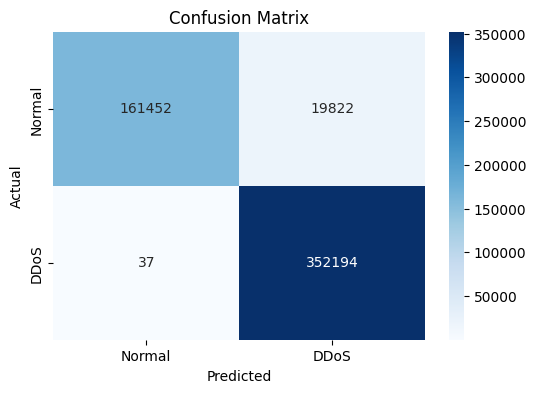

In [221]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=['Normal', 'DDoS'], yticklabels=['Normal', 'DDoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Accuracy Over Epochs')

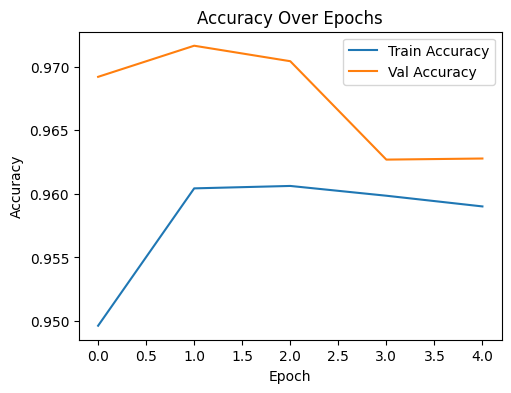

In [223]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn.history['accuracy'], label='Train Accuracy')
plt.plot(cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

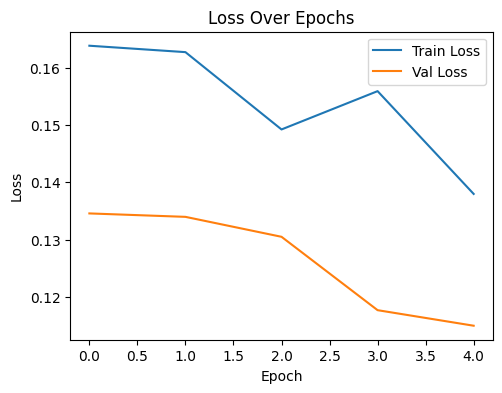

In [225]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(cnn.history['loss'], label='Train Loss')
plt.plot(cnn.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# ROC_AUC Curves

16673/16673 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step
Test ROC-AUC Score: 0.9867


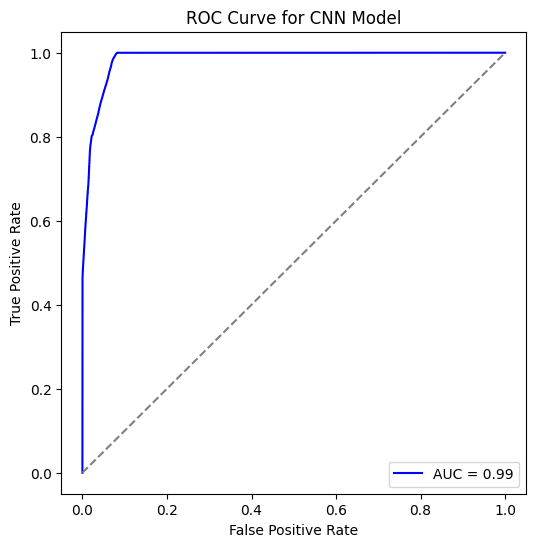

In [292]:
from sklearn.metrics import roc_auc_score, roc_curve
# Generate predictions for ROC-AUC
y_pred_cnn = model_cnn.predict(X_test_cnn).ravel() 

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_cnn)
print(f"Test ROC-AUC Score: {roc_auc:.4f}")
fpr, tpr, _ = roc_curve(y_test, y_pred_cnn)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.show()

# Summarizing all ROC Curves

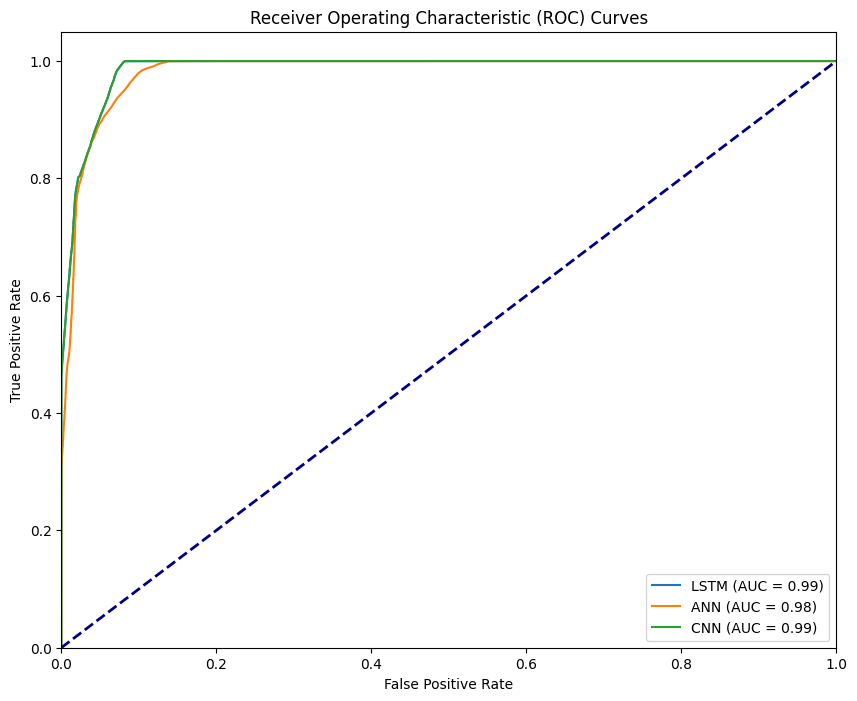

In [290]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have y_test and probability predictions for each model:
# y_pred_prob_lstm, y_pred_prob_bilstm, y_pred_prob_ann, y_pred_prob_cnn, svm_probabilities

models = {
    "LSTM": y_pred_prob,
    "ANN": y_pred_ann,
    "CNN": y_pred_cnn,
}

plt.figure(figsize=(10, 8))

for model_name, y_pred_prob in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curves")
plt.legend(loc="lower right")
plt.show()

In [299]:
import pandas as pd

data = {'Model': ['LSTM','CNN', 'ANN'],
        'Accuracy': [0.9726, 0.9628, 0.9520],  
        'Precision': [0.9607, 0.9466, 0.9323], 
        'Recall': [0.9999, 0.9993, 0.9992]}   

results_df = pd.DataFrame(data)
results_df

,Model,Accuracy,Precision,Recall
0,LSTM,0.9726,0.9607,0.9999
1,CNN,0.9628,0.9466,0.9993
2,ANN,0.9520,0.9323,0.9992


# Displaying all models Accuracy,Precision and Recall

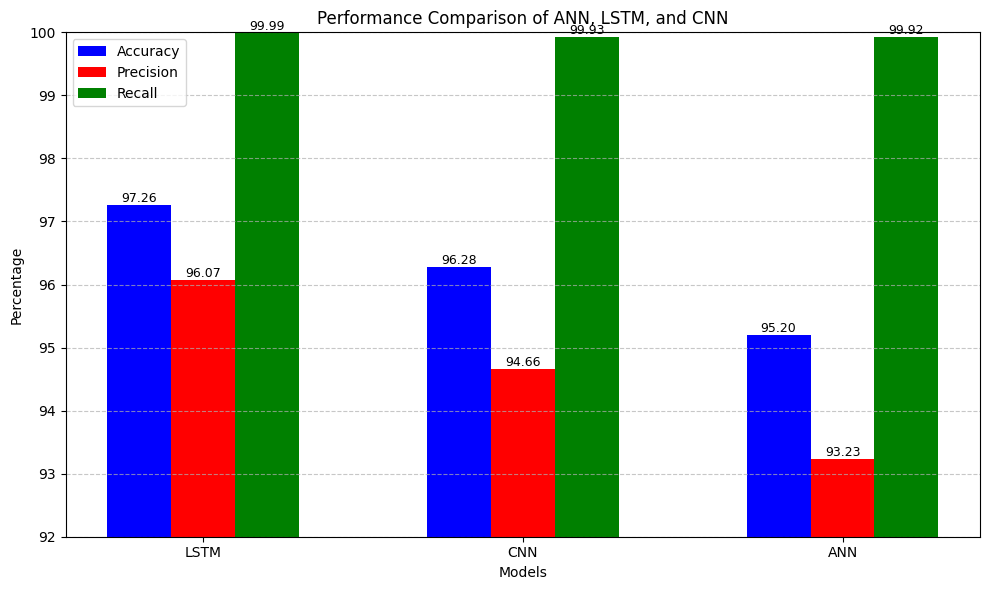

In [310]:
import numpy as np
import matplotlib.pyplot as plt

models = ["LSTM", "CNN", "ANN"]
accuracy = [97.26, 96.28, 95.20]  
precision = [96.07, 94.66, 93.23]  
recall = [99.99, 99.93, 99.92]  

# X-axis positions
x = np.arange(len(models))
width = 0.2  

plt.figure(figsize=(10, 6))  # Increased figure size for better visibility

# Create bars for each metric
bars1 = plt.bar(x - width, accuracy, width, label='Accuracy', color='blue')
bars2 = plt.bar(x, precision, width, label='Precision', color='red')
bars3 = plt.bar(x + width, recall, width, label='Recall', color='green')

# Set labels and title
plt.xlabel("Models")
plt.ylabel("Percentage")
plt.title("Performance Comparison of ANN, LSTM, and CNN")
plt.xticks(x, models)
plt.ylim(92, 100)  # Limit y-axis from 90 to 100

# Add value labels on top of each bar
for bars, values in [(bars1, accuracy), (bars2, precision), (bars3, recall)]:
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{value:.2f}',  # Show 2 decimal places
                 ha='center', va='bottom', fontsize=9, color='black')

# Add legend
plt.legend()

# Optional: Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()